In [1]:
import doppelganger as dg
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset
from torch.utils.tensorboard import SummaryWriter
from torch import Tensor


In [4]:
# Read wiki data
wwt = pd.read_csv("data/wwt-50k-training.csv.gz", index_col=0)
wwt.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-28,2016-12-29,2016-12-30,2016-12-31,domain,access,agent,domain_name,access_name,agent_name
0,-0.953478,-0.890449,-0.869384,-0.841322,-0.763911,-0.859178,-0.845235,-0.833588,-0.849179,-0.881915,...,-0.516602,-0.542549,-0.597727,-0.653796,3,0,0,es.wikipedia.org,all-access,all-agents
1,-0.652367,-0.665763,-0.749920,-0.796235,-0.749920,-0.940103,-0.823950,-0.712078,-0.665763,-0.796235,...,-0.665763,-0.680083,-0.796235,-0.680083,6,1,0,ru.wikipedia.org,desktop,all-agents
2,0.056571,0.035157,-0.100391,-0.342879,-0.264962,-0.038755,-0.019944,-0.089247,-0.094342,-0.227595,...,-0.619415,-0.628571,-0.719442,-0.812384,3,0,0,es.wikipedia.org,all-access,all-agents
3,-0.199499,-0.199499,-0.216112,-0.216112,-0.311184,-0.233432,-0.344652,-0.216112,-0.023780,-0.251522,...,-0.290310,-0.175786,-0.260878,-0.183538,2,0,1,en.wikipedia.org,all-access,spider
4,-0.066951,-0.571080,-0.833646,-0.532329,-0.391577,-0.149342,0.026857,0.083221,0.105196,-0.019007,...,-0.444236,-0.380625,-0.450464,-0.539831,2,0,1,en.wikipedia.org,all-access,spider


In [5]:
# Create attribute and feature arrays
wwt_attributes = wwt[["domain", "access", "agent"]].to_numpy()
print(wwt_attributes.shape)
wwt_features = wwt.iloc[:, 0:550].to_numpy().reshape(50000, 550, 1)


wwt_features = wwt_features[:,:,:]
print(wwt_features.shape)


(50000, 3)
(50000, 550, 1)


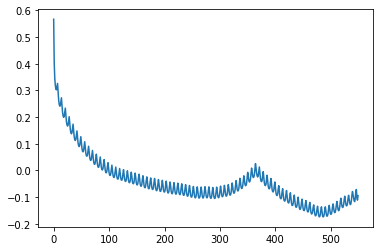

In [6]:
# Plot autocovariance in real time series
real_autocov = dg.autocovariance(wwt_features)

plt.plot(real_autocov)
plt.show()

In [7]:
# Prepare data
dg_data = dg.prepare_data(
    wwt_attributes,
    [dg.OutputType.DISCRETE] * 3,
    wwt_features,
    [dg.OutputType.CONTINUOUS],
    normalization=dg.Normalization.MINUSONE_ONE,
    is_feature_normalized=False,
    is_example_normalized=True)


In [8]:
# Train doppelganger model

sample_size = 50000
dataset = TensorDataset(
    Tensor(dg_data.attributes[0:sample_size, :]),
    Tensor(dg_data.additional_attributes[0:sample_size, :]),
    Tensor(dg_data.features[0:sample_size,:, :]),
)
mymodel = dg.DGTorch(
    dg_data.attribute_outputs,
    dg_data.additional_attribute_outputs,
    dg_data.feature_outputs,
    max_sequence_len=dg_data.features.shape[1],
    sample_len=10,
    use_attribute_discriminator=True,
    attribute_loss_coef=1,
    gradient_penalty_coef=10,
    attribute_gradient_penalty_coef=10,
)

writer = SummaryWriter()

mymodel.train(dataset, batch_size=100, num_epochs=400, tb_writer=writer)


epoch: 0


500it [01:32,  5.40it/s]


epoch: 1


500it [01:33,  5.37it/s]


epoch: 2


500it [01:31,  5.46it/s]


epoch: 3


500it [01:31,  5.45it/s]


epoch: 4


500it [01:32,  5.42it/s]


epoch: 5


500it [01:31,  5.44it/s]


epoch: 6


500it [01:32,  5.43it/s]


epoch: 7


500it [01:31,  5.43it/s]


epoch: 8


500it [01:34,  5.29it/s]


epoch: 9


500it [01:38,  5.09it/s]


epoch: 10


500it [01:39,  5.03it/s]


epoch: 11


500it [01:40,  4.99it/s]


epoch: 12


500it [01:43,  4.82it/s]


epoch: 13


500it [01:47,  4.65it/s]


epoch: 14


500it [01:51,  4.49it/s]


epoch: 15


500it [01:50,  4.53it/s]


epoch: 16


500it [01:50,  4.50it/s]


epoch: 17


500it [01:44,  4.77it/s]


epoch: 18


500it [01:43,  4.84it/s]


epoch: 19


500it [01:46,  4.70it/s]


epoch: 20


500it [01:47,  4.66it/s]


epoch: 21


500it [01:49,  4.55it/s]


epoch: 22


500it [01:54,  4.36it/s]


epoch: 23


500it [01:57,  4.24it/s]


epoch: 24


500it [01:57,  4.24it/s]


epoch: 25


500it [01:51,  4.47it/s]


epoch: 26


500it [01:50,  4.51it/s]


epoch: 27


500it [01:46,  4.70it/s]


epoch: 28


500it [01:44,  4.77it/s]


epoch: 29


500it [01:46,  4.70it/s]


epoch: 30


500it [01:46,  4.69it/s]


epoch: 31


500it [01:43,  4.85it/s]


epoch: 32


500it [01:38,  5.06it/s]


epoch: 33


500it [01:39,  5.03it/s]


epoch: 34


500it [01:36,  5.16it/s]


epoch: 35


500it [01:35,  5.21it/s]


epoch: 36


500it [01:38,  5.08it/s]


epoch: 37


500it [01:39,  5.03it/s]


epoch: 38


500it [01:40,  4.99it/s]


epoch: 39


500it [01:43,  4.85it/s]


epoch: 40


500it [01:47,  4.67it/s]


epoch: 41


500it [01:52,  4.45it/s]


epoch: 42


500it [01:52,  4.43it/s]


epoch: 43


500it [01:50,  4.51it/s]


epoch: 44


500it [01:52,  4.46it/s]


epoch: 45


500it [01:52,  4.44it/s]


epoch: 46


500it [01:55,  4.34it/s]


epoch: 47


500it [01:56,  4.30it/s]


epoch: 48


500it [01:56,  4.28it/s]


epoch: 49


500it [01:59,  4.19it/s]


epoch: 50


500it [02:00,  4.15it/s]


epoch: 51


500it [02:05,  4.00it/s]


epoch: 52


500it [02:06,  3.95it/s]


epoch: 53


500it [02:06,  3.96it/s]


epoch: 54


500it [02:06,  3.95it/s]


epoch: 55


500it [02:11,  3.79it/s]


epoch: 56


500it [02:09,  3.87it/s]


epoch: 57


500it [02:10,  3.82it/s]


epoch: 58


500it [02:12,  3.77it/s]


epoch: 59


500it [02:10,  3.83it/s]


epoch: 60


500it [02:05,  3.99it/s]


epoch: 61


500it [02:04,  4.00it/s]


epoch: 62


500it [02:03,  4.04it/s]


epoch: 63


500it [02:05,  3.99it/s]


epoch: 64


500it [02:08,  3.89it/s]


epoch: 65


500it [02:11,  3.80it/s]


epoch: 66


500it [02:11,  3.80it/s]


epoch: 67


500it [02:09,  3.86it/s]


epoch: 68


500it [02:09,  3.87it/s]


epoch: 69


500it [02:10,  3.83it/s]


epoch: 70


500it [02:12,  3.78it/s]


epoch: 71


500it [02:17,  3.65it/s]


epoch: 72


500it [02:15,  3.69it/s]


epoch: 73


500it [02:17,  3.65it/s]


epoch: 74


500it [02:20,  3.55it/s]


epoch: 75


500it [02:19,  3.58it/s]


epoch: 76


500it [02:21,  3.54it/s]


epoch: 77


500it [02:18,  3.60it/s]


epoch: 78


500it [02:17,  3.64it/s]


epoch: 79


500it [02:17,  3.62it/s]


epoch: 80


500it [02:19,  3.58it/s]


epoch: 81


500it [02:21,  3.53it/s]


epoch: 82


500it [02:24,  3.47it/s]


epoch: 83


500it [02:24,  3.46it/s]


epoch: 84


500it [02:23,  3.49it/s]


epoch: 85


500it [02:23,  3.48it/s]


epoch: 86


500it [02:27,  3.38it/s]


epoch: 87


500it [02:24,  3.46it/s]


epoch: 88


500it [02:23,  3.49it/s]


epoch: 89


500it [02:24,  3.46it/s]


epoch: 90


500it [02:25,  3.45it/s]


epoch: 91


500it [02:27,  3.39it/s]


epoch: 92


500it [02:30,  3.33it/s]


epoch: 93


500it [02:30,  3.33it/s]


epoch: 94


500it [02:32,  3.27it/s]


epoch: 95


500it [02:32,  3.27it/s]


epoch: 96


500it [02:33,  3.25it/s]


epoch: 97


500it [02:31,  3.30it/s]


epoch: 98


500it [02:34,  3.23it/s]


epoch: 99


500it [02:35,  3.22it/s]


epoch: 100


500it [02:36,  3.20it/s]


epoch: 101


500it [02:36,  3.20it/s]


epoch: 102


500it [02:35,  3.21it/s]


epoch: 103


500it [02:37,  3.18it/s]


epoch: 104


500it [02:36,  3.20it/s]


epoch: 105


500it [02:34,  3.23it/s]


epoch: 106


500it [02:36,  3.19it/s]


epoch: 107


500it [02:35,  3.22it/s]


epoch: 108


500it [02:35,  3.22it/s]


epoch: 109


500it [02:37,  3.17it/s]


epoch: 110


500it [02:35,  3.21it/s]


epoch: 111


500it [02:36,  3.19it/s]


epoch: 112


500it [02:34,  3.24it/s]


epoch: 113


500it [02:33,  3.25it/s]


epoch: 114


500it [02:35,  3.21it/s]


epoch: 115


500it [02:34,  3.24it/s]


epoch: 116


500it [02:36,  3.20it/s]


epoch: 117


500it [02:36,  3.20it/s]


epoch: 118


500it [02:36,  3.19it/s]


epoch: 119


500it [02:36,  3.20it/s]


epoch: 120


500it [02:39,  3.14it/s]


epoch: 121


500it [02:38,  3.15it/s]


epoch: 122


500it [02:38,  3.16it/s]


epoch: 123


500it [02:40,  3.12it/s]


epoch: 124


500it [02:42,  3.08it/s]


epoch: 125


500it [02:28,  3.37it/s]


epoch: 126


500it [02:29,  3.35it/s]


epoch: 127


500it [02:27,  3.38it/s]


epoch: 128


500it [02:31,  3.31it/s]


epoch: 129


500it [02:30,  3.32it/s]


epoch: 130


500it [02:33,  3.26it/s]


epoch: 131


500it [02:32,  3.28it/s]


epoch: 132


500it [02:30,  3.32it/s]


epoch: 133


500it [02:32,  3.27it/s]


epoch: 134


500it [02:36,  3.20it/s]


epoch: 135


500it [02:36,  3.20it/s]


epoch: 136


500it [02:35,  3.22it/s]


epoch: 137


500it [02:35,  3.21it/s]


epoch: 138


500it [02:36,  3.19it/s]


epoch: 139


500it [02:36,  3.19it/s]


epoch: 140


500it [02:38,  3.15it/s]


epoch: 141


500it [02:41,  3.10it/s]


epoch: 142


500it [02:38,  3.16it/s]


epoch: 143


500it [02:38,  3.15it/s]


epoch: 144


500it [02:43,  3.06it/s]


epoch: 145


500it [02:46,  3.00it/s]


epoch: 146


500it [02:46,  3.01it/s]


epoch: 147


500it [02:45,  3.01it/s]


epoch: 148


500it [02:46,  3.00it/s]


epoch: 149


500it [02:45,  3.01it/s]


epoch: 150


500it [02:43,  3.06it/s]


epoch: 151


500it [02:44,  3.05it/s]


epoch: 152


500it [02:42,  3.07it/s]


epoch: 153


500it [02:49,  2.94it/s]


epoch: 154


500it [02:40,  3.11it/s]


epoch: 155


500it [02:40,  3.11it/s]


epoch: 156


500it [02:39,  3.13it/s]


epoch: 157


500it [02:40,  3.11it/s]


epoch: 158


500it [02:40,  3.12it/s]


epoch: 159


500it [02:42,  3.09it/s]


epoch: 160


500it [02:42,  3.07it/s]


epoch: 161


500it [02:41,  3.09it/s]


epoch: 162


500it [02:39,  3.13it/s]


epoch: 163


500it [02:39,  3.14it/s]


epoch: 164


500it [02:40,  3.12it/s]


epoch: 165


500it [02:40,  3.12it/s]


epoch: 166


500it [02:40,  3.12it/s]


epoch: 167


500it [02:40,  3.12it/s]


epoch: 168


500it [02:44,  3.05it/s]


epoch: 169


500it [02:41,  3.09it/s]


epoch: 170


500it [02:41,  3.10it/s]


epoch: 171


500it [02:40,  3.11it/s]


epoch: 172


500it [02:40,  3.12it/s]


epoch: 173


500it [02:40,  3.12it/s]


epoch: 174


500it [02:39,  3.14it/s]


epoch: 175


500it [02:38,  3.16it/s]


epoch: 176


500it [02:38,  3.15it/s]


epoch: 177


500it [02:39,  3.13it/s]


epoch: 178


500it [02:38,  3.14it/s]


epoch: 179


500it [02:38,  3.16it/s]


epoch: 180


500it [02:36,  3.19it/s]


epoch: 181


500it [02:37,  3.18it/s]


epoch: 182


500it [02:38,  3.15it/s]


epoch: 183


500it [02:37,  3.17it/s]


epoch: 184


500it [02:39,  3.14it/s]


epoch: 185


500it [02:37,  3.17it/s]


epoch: 186


500it [02:36,  3.20it/s]


epoch: 187


500it [02:35,  3.23it/s]


epoch: 188


500it [02:36,  3.19it/s]


epoch: 189


500it [02:36,  3.19it/s]


epoch: 190


500it [02:35,  3.22it/s]


epoch: 191


500it [02:35,  3.22it/s]


epoch: 192


500it [02:34,  3.23it/s]


epoch: 193


500it [02:33,  3.27it/s]


epoch: 194


500it [02:32,  3.28it/s]


epoch: 195


500it [02:30,  3.31it/s]


epoch: 196


500it [02:29,  3.35it/s]


epoch: 197


500it [02:33,  3.25it/s]


epoch: 198


500it [02:32,  3.27it/s]


epoch: 199


500it [02:31,  3.29it/s]


epoch: 200


500it [02:29,  3.34it/s]


epoch: 201


500it [02:32,  3.28it/s]


epoch: 202


500it [02:28,  3.36it/s]


epoch: 203


500it [02:29,  3.34it/s]


epoch: 204


500it [02:28,  3.38it/s]


epoch: 205


500it [02:29,  3.35it/s]


epoch: 206


500it [02:29,  3.35it/s]


epoch: 207


500it [02:28,  3.36it/s]


epoch: 208


500it [02:30,  3.33it/s]


epoch: 209


500it [02:30,  3.31it/s]


epoch: 210


500it [02:29,  3.35it/s]


epoch: 211


500it [02:28,  3.36it/s]


epoch: 212


500it [02:27,  3.38it/s]


epoch: 213


500it [02:28,  3.37it/s]


epoch: 214


500it [02:26,  3.42it/s]


epoch: 215


500it [02:27,  3.40it/s]


epoch: 216


500it [02:25,  3.43it/s]


epoch: 217


500it [02:24,  3.47it/s]


epoch: 218


500it [02:21,  3.54it/s]


epoch: 219


500it [02:20,  3.56it/s]


epoch: 220


500it [02:20,  3.56it/s]


epoch: 221


500it [02:22,  3.50it/s]


epoch: 222


500it [02:23,  3.49it/s]


epoch: 223


500it [02:23,  3.49it/s]


epoch: 224


500it [02:23,  3.48it/s]


epoch: 225


500it [02:24,  3.47it/s]


epoch: 226


500it [02:23,  3.48it/s]


epoch: 227


500it [02:23,  3.49it/s]


epoch: 228


500it [02:21,  3.52it/s]


epoch: 229


500it [02:21,  3.52it/s]


epoch: 230


500it [02:21,  3.52it/s]


epoch: 231


500it [02:22,  3.51it/s]


epoch: 232


500it [02:23,  3.47it/s]


epoch: 233


500it [02:23,  3.49it/s]


epoch: 234


500it [02:23,  3.48it/s]


epoch: 235


500it [02:24,  3.46it/s]


epoch: 236


500it [02:24,  3.46it/s]


epoch: 237


500it [02:24,  3.46it/s]


epoch: 238


500it [02:25,  3.45it/s]


epoch: 239


500it [02:23,  3.50it/s]


epoch: 240


500it [02:23,  3.49it/s]


epoch: 241


500it [02:22,  3.50it/s]


epoch: 242


500it [02:22,  3.50it/s]


epoch: 243


500it [02:21,  3.54it/s]


epoch: 244


500it [02:19,  3.59it/s]


epoch: 245


500it [02:19,  3.57it/s]


epoch: 246


500it [02:20,  3.55it/s]


epoch: 247


500it [02:23,  3.47it/s]


epoch: 248


500it [02:21,  3.52it/s]


epoch: 249


500it [02:22,  3.52it/s]


epoch: 250


500it [02:23,  3.49it/s]


epoch: 251


500it [02:22,  3.52it/s]


epoch: 252


500it [02:22,  3.52it/s]


epoch: 253


500it [02:22,  3.50it/s]


epoch: 254


500it [02:22,  3.51it/s]


epoch: 255


500it [02:22,  3.52it/s]


epoch: 256


500it [02:20,  3.55it/s]


epoch: 257


500it [02:21,  3.54it/s]


epoch: 258


500it [02:21,  3.53it/s]


epoch: 259


500it [02:23,  3.49it/s]


epoch: 260


500it [02:22,  3.50it/s]


epoch: 261


500it [02:22,  3.52it/s]


epoch: 262


500it [02:20,  3.55it/s]


epoch: 263


500it [02:20,  3.57it/s]


epoch: 264


500it [02:20,  3.55it/s]


epoch: 265


500it [02:21,  3.54it/s]


epoch: 266


500it [02:20,  3.55it/s]


epoch: 267


500it [02:20,  3.56it/s]


epoch: 268


500it [02:20,  3.56it/s]


epoch: 269


500it [02:19,  3.57it/s]


epoch: 270


500it [02:19,  3.58it/s]


epoch: 271


500it [02:18,  3.61it/s]


epoch: 272


500it [02:17,  3.63it/s]


epoch: 273


500it [02:17,  3.63it/s]


epoch: 274


500it [02:20,  3.55it/s]


epoch: 275


500it [02:19,  3.59it/s]


epoch: 276


500it [02:19,  3.59it/s]


epoch: 277


500it [02:17,  3.64it/s]


epoch: 278


500it [02:17,  3.64it/s]


epoch: 279


500it [02:21,  3.52it/s]


epoch: 280


500it [02:20,  3.56it/s]


epoch: 281


500it [02:18,  3.62it/s]


epoch: 282


500it [02:21,  3.53it/s]


epoch: 283


500it [02:19,  3.59it/s]


epoch: 284


500it [02:19,  3.58it/s]


epoch: 285


500it [02:20,  3.57it/s]


epoch: 286


500it [02:19,  3.58it/s]


epoch: 287


500it [02:18,  3.61it/s]


epoch: 288


500it [02:19,  3.58it/s]


epoch: 289


500it [02:21,  3.53it/s]


epoch: 290


500it [02:21,  3.55it/s]


epoch: 291


500it [02:30,  3.33it/s]


epoch: 292


500it [02:27,  3.40it/s]


epoch: 293


500it [02:25,  3.43it/s]


epoch: 294


500it [02:25,  3.44it/s]


epoch: 295


500it [02:23,  3.48it/s]


epoch: 296


500it [02:23,  3.49it/s]


epoch: 297


500it [02:22,  3.51it/s]


epoch: 298


500it [02:20,  3.56it/s]


epoch: 299


500it [02:18,  3.61it/s]


epoch: 300


500it [02:16,  3.68it/s]


epoch: 301


500it [02:18,  3.60it/s]


epoch: 302


500it [02:19,  3.59it/s]


epoch: 303


500it [02:17,  3.63it/s]


epoch: 304


500it [02:16,  3.66it/s]


epoch: 305


500it [02:15,  3.69it/s]


epoch: 306


500it [02:16,  3.65it/s]


epoch: 307


500it [02:16,  3.66it/s]


epoch: 308


500it [02:15,  3.69it/s]


epoch: 309


500it [02:16,  3.66it/s]


epoch: 310


500it [02:16,  3.67it/s]


epoch: 311


500it [02:16,  3.68it/s]


epoch: 312


500it [02:15,  3.69it/s]


epoch: 313


500it [02:14,  3.71it/s]


epoch: 314


500it [02:14,  3.72it/s]


epoch: 315


500it [02:14,  3.73it/s]


epoch: 316


500it [02:14,  3.71it/s]


epoch: 317


500it [02:13,  3.74it/s]


epoch: 318


500it [02:12,  3.76it/s]


epoch: 319


500it [02:13,  3.75it/s]


epoch: 320


500it [02:13,  3.75it/s]


epoch: 321


500it [02:13,  3.74it/s]


epoch: 322


500it [02:12,  3.78it/s]


epoch: 323


500it [02:12,  3.78it/s]


epoch: 324


500it [02:12,  3.77it/s]


epoch: 325


500it [02:12,  3.79it/s]


epoch: 326


500it [02:11,  3.80it/s]


epoch: 327


500it [02:11,  3.79it/s]


epoch: 328


500it [02:13,  3.76it/s]


epoch: 329


500it [02:12,  3.78it/s]


epoch: 330


500it [02:10,  3.83it/s]


epoch: 331


500it [02:10,  3.84it/s]


epoch: 332


500it [02:11,  3.81it/s]


epoch: 333


500it [02:11,  3.81it/s]


epoch: 334


500it [02:11,  3.81it/s]


epoch: 335


500it [02:11,  3.81it/s]


epoch: 336


500it [02:11,  3.80it/s]


epoch: 337


500it [02:11,  3.80it/s]


epoch: 338


500it [02:09,  3.85it/s]


epoch: 339


500it [02:10,  3.82it/s]


epoch: 340


500it [02:11,  3.80it/s]


epoch: 341


500it [02:10,  3.84it/s]


epoch: 342


500it [02:09,  3.87it/s]


epoch: 343


500it [02:10,  3.83it/s]


epoch: 344


500it [02:11,  3.80it/s]


epoch: 345


500it [02:08,  3.90it/s]


epoch: 346


500it [02:09,  3.86it/s]


epoch: 347


500it [02:09,  3.86it/s]


epoch: 348


500it [02:08,  3.90it/s]


epoch: 349


500it [02:07,  3.91it/s]


epoch: 350


500it [02:07,  3.91it/s]


epoch: 351


500it [02:08,  3.89it/s]


epoch: 352


500it [02:07,  3.92it/s]


epoch: 353


500it [02:09,  3.88it/s]


epoch: 354


500it [02:07,  3.93it/s]


epoch: 355


500it [02:06,  3.95it/s]


epoch: 356


500it [02:07,  3.91it/s]


epoch: 357


500it [02:06,  3.94it/s]


epoch: 358


500it [02:07,  3.91it/s]


epoch: 359


500it [02:06,  3.95it/s]


epoch: 360


500it [02:05,  3.99it/s]


epoch: 361


500it [02:04,  4.02it/s]


epoch: 362


500it [02:05,  4.00it/s]


epoch: 363


500it [02:05,  3.97it/s]


epoch: 364


500it [02:04,  4.01it/s]


epoch: 365


500it [02:05,  3.97it/s]


epoch: 366


500it [02:05,  3.98it/s]


epoch: 367


500it [02:05,  3.97it/s]


epoch: 368


500it [02:05,  4.00it/s]


epoch: 369


500it [02:05,  3.98it/s]


epoch: 370


500it [02:06,  3.96it/s]


epoch: 371


500it [02:06,  3.96it/s]


epoch: 372


500it [02:06,  3.96it/s]


epoch: 373


500it [02:06,  3.94it/s]


epoch: 374


500it [02:06,  3.96it/s]


epoch: 375


500it [02:05,  3.98it/s]


epoch: 376


500it [02:05,  3.97it/s]


epoch: 377


500it [02:05,  4.00it/s]


epoch: 378


500it [02:05,  3.98it/s]


epoch: 379


500it [02:05,  3.99it/s]


epoch: 380


500it [02:06,  3.97it/s]


epoch: 381


500it [02:06,  3.94it/s]


epoch: 382


500it [02:05,  3.98it/s]


epoch: 383


500it [02:04,  4.02it/s]


epoch: 384


500it [02:06,  3.94it/s]


epoch: 385


500it [02:04,  4.03it/s]


epoch: 386


500it [02:04,  4.02it/s]


epoch: 387


500it [02:03,  4.04it/s]


epoch: 388


500it [02:04,  4.01it/s]


epoch: 389


500it [02:05,  4.00it/s]


epoch: 390


500it [02:04,  4.01it/s]


epoch: 391


500it [02:05,  3.97it/s]


epoch: 392


500it [02:05,  3.98it/s]


epoch: 393


500it [02:05,  3.97it/s]


epoch: 394


500it [02:05,  3.97it/s]


epoch: 395


500it [02:05,  3.99it/s]


epoch: 396


500it [02:04,  4.02it/s]


epoch: 397


500it [02:04,  4.01it/s]


epoch: 398


500it [02:03,  4.05it/s]


epoch: 399


500it [02:03,  4.06it/s]


In [9]:
# Generate some data from the networks
attributes, features = mymodel.generate(batch_size=5000) 

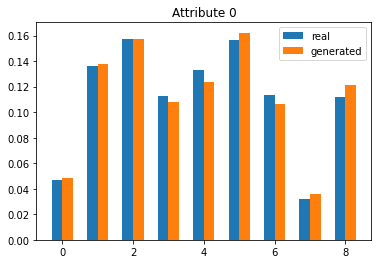

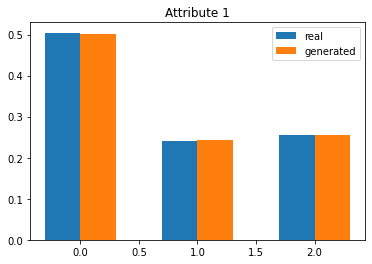

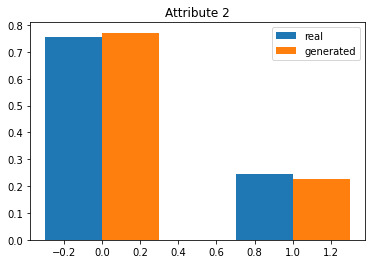

In [10]:
# Attribute comparison
for i in range(3):
    real_probs = np.bincount(wwt_attributes[:,i]) / len(wwt_attributes)
    generated_probs = np.bincount(attributes[:,i]) / len(attributes)
    plt.bar(np.arange(len(real_probs)) - 0.15, real_probs, width=0.3, label="real")
    plt.bar(np.arange(len(generated_probs)) + 0.15, generated_probs, width=0.3, label="generated")
    plt.legend()
    plt.title("Attribute {}".format(i))
    plt.show()

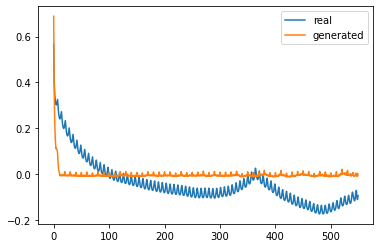

In [11]:
# Feature comparison via autocovariance
generated_autocov = dg.autocovariance(features)

plt.plot(real_autocov, label="real")
plt.plot(generated_autocov, label="generated")
plt.legend()
plt.show()

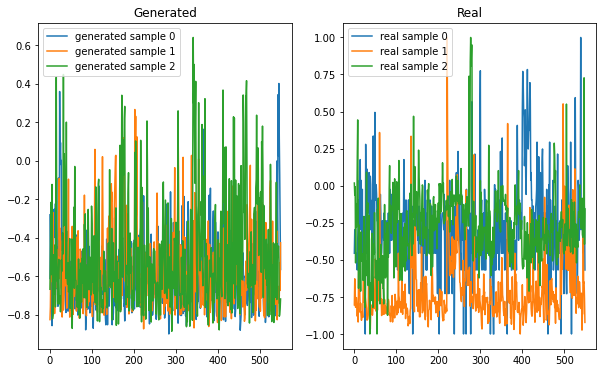

In [12]:
# Feature comparison side-by-side

num_samples = 3

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Generated")
for index, sample in enumerate(random.sample(range(len(features)), num_samples)):
    ax1.plot(features[sample,:,0], label="generated sample {}".format(index))
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Real")
for index, sample in enumerate(random.sample(range(len(wwt_features)), num_samples)):
    ax2.plot(wwt_features[sample,:,0], label="real sample {}".format(index))
ax2.legend()

plt.show()